<a href="https://colab.research.google.com/github/alimoorreza/CS143-SP26-P2/blob/main/p2_blind_search_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Search Algorithms


This notebook uses a new class in our `mapbots` module called `FullyObservableStreetSweeperWorld` which is a subclass of the StreetSweeperWorld we worked with that reveals more details of the environment that the bot can use to make decisions.

You do need to install a new version of the module. You can do probably do that with something like this (which should upgrade if you ran it on your own computer - or it should always work in Colab).

In [1]:
import sys

!{sys.executable} -m pip install mapbots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 2.9 MB/s eta 0:00:00


## Getting Started

We create the bot/environment in the same way, except that the name of the class is `FullyObservableStreetSweeperWorld`

Setting up the map. This may take a few minutes.


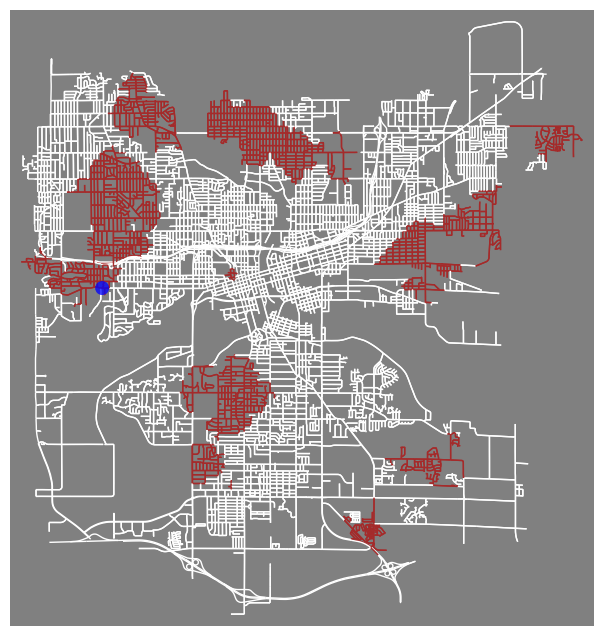

In [ ]:
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()

In [ ]:
# We need a way to represent the nodes in the tree
# I'm trying to keep this one simple, but you could
# use better object-oriented programming practices
class SSWSearchNode:

    def __init__(self,location,parent=None):

        self.location = location #this is the state

        self.parent = parent #keeps track of the node that leads to this one
        self.children = [] #a list of all the nodes that appear below this when expanded

    # we'll add all the new nodes using this function when we "expand" this node
    def add_child(self,new_child_node):
        self.children.append(new_child_node)

In [ ]:
# BFS with deque() datastructure
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque
import time


def bfs(bot,destination):
    # measure time to find efficiency of bfs()
    start_time = time.time()

    # initialize the frontier using the initial state of problem
    initial_location = bot.get_current_location()
    root_node = SSWSearchNode(initial_location["location_id"])
    frontier = deque()
    frontier.append(root_node) # INSERT(initial_state, frontier)


    while True:
        if frontier == []: # if the frontier is empty then return failure
            return None    # failure

        # choose a leaf node from the frontier according to strategy
        chosen_leaf = frontier.popleft() # REMOVE(frontier): take the thing off the front of the "queue"

        # if the node contains a goal state then return the corresponding solution
        if chosen_leaf.location == destination: #destination is the goal

            # calculate the total time spent during bfs() when the goal is reached
            print('successfully reached goal state in', (time.time() - start_time), 'seconds')

            # we're looping through the tree and creating a list from the locations in each node
            route = deque()
            curr_node = chosen_leaf
            while curr_node.parent != None:
                route.appendleft(curr_node.location)
                curr_node = curr_node.parent
            return route
        # else expand the node and add the resulting nodes to the frontier
        else:


            for street in bot.get_outgoing_streets_from_location( chosen_leaf.location ):
                new_node = SSWSearchNode(street["end"]["location_id"], parent=chosen_leaf)

                chosen_leaf.add_child(new_node)
                frontier.append(new_node)


    # calculate the total time spent during bfs() when the goal is reached
    print('Could not reach goal state in', (time.time() - start_time), 'seconds')


Setting up the map. This may take a few minutes.


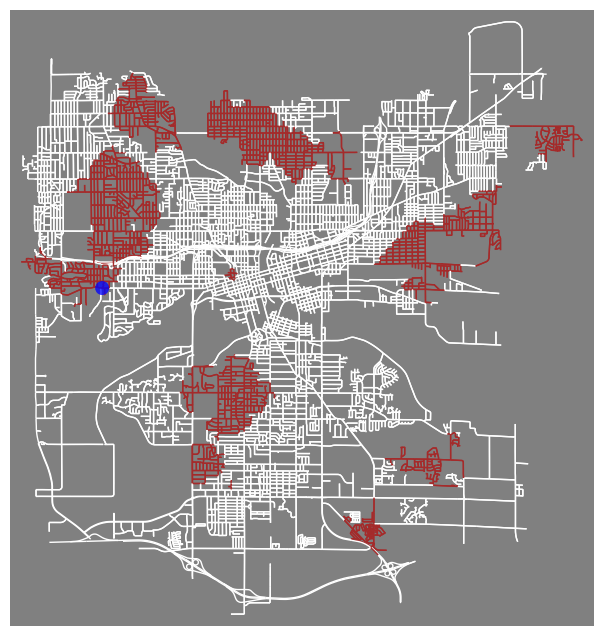

[{'center': 160943081, 'size': 1755},
 {'center': 9711905135, 'size': 954},
 {'center': 160911825, 'size': 1041},
 {'center': 160955062, 'size': 389},
 {'center': 160834040, 'size': 1647},
 {'center': 160929439, 'size': 975},
 {'center': 160976135, 'size': 1258},
 {'center': 160840119, 'size': 193},
 {'center': 160910548, 'size': 622},
 {'center': 160820766, 'size': 186},
 {'center': 160936218, 'size': 1659},
 {'center': 1163858728, 'size': 1300},
 {'center': 160772452, 'size': 1220},
 {'center': 160895527, 'size': 1976},
 {'center': 160911954, 'size': 1340},
 {'center': 4799067674, 'size': 1261},
 {'center': 160995977, 'size': 323},
 {'center': 160971809, 'size': 31},
 {'center': 160934383, 'size': 130},
 {'center': 160790885, 'size': 74},
 {'center': 160842274, 'size': 1802},
 {'center': 160855919, 'size': 1229},
 {'center': 160759140, 'size': 1594},
 {'center': 160914943, 'size': 669},
 {'center': 160908607, 'size': 1211},
 {'center': 160844167, 'size': 1064}]

source location: 160854122
destination location: 160855919


In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [ ]:
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = bfs(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by bfs():', len(calculated_route))

source location: 160854122
destination location: 160855919
successfully reached goal state in 3.5865657329559326 seconds
Number of states (or location_ids) along the solution provided by bfs(): 9


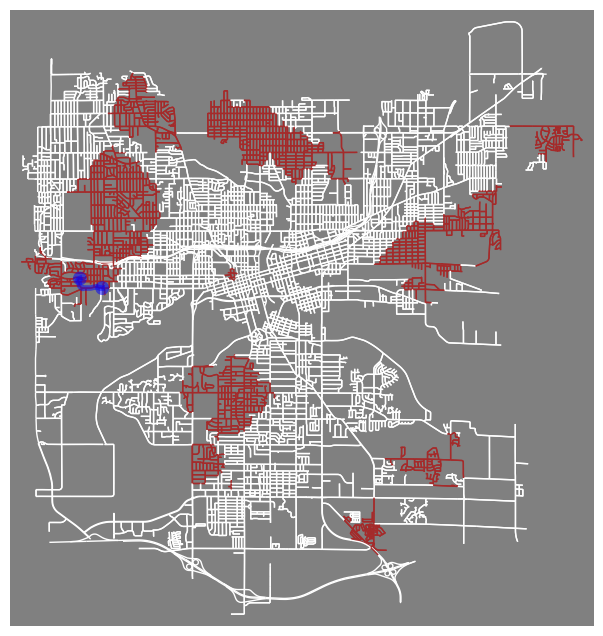

In [ ]:
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

## Exercise#1
Try finding a route to another destination from the `dirty_regions` list. You'll see that it takes a really really really long time. Why do you think that is?

## Exercise#2

What changes do we need to make to the `bfs` code to make it run faster or more efficient? Try to code that up.

In [ ]:
# Solution with deque() datastructure
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque
import time

'''
def bfs_efficient(bot,destination):

'''


In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [ ]:
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = bfs_efficient(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by bfs():', len(calculated_route))

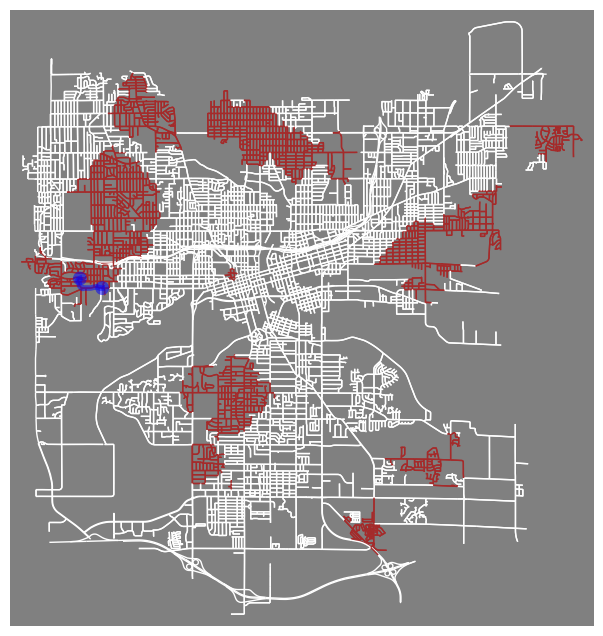

In [ ]:
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

## Exercise#3

What changes do we need to make to the `bfs` code to make it work for `dfs`?

In [ ]:
# Solution with deque() datastructure
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque
import time


'''
def dfs_efficient(bot,destination):

'''


In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [ ]:
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = dfs_efficient(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by dfs():', len(calculated_route))

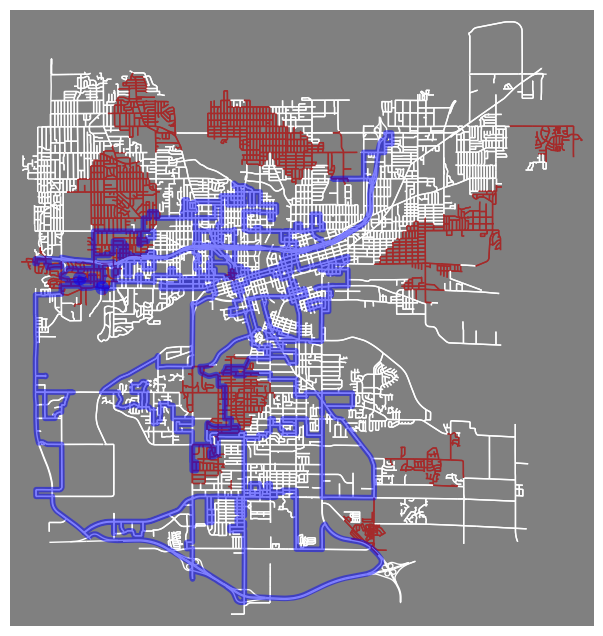

In [ ]:
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

## Exercise#4

Since we have a problem with costs associated with each action (e.g., Travel Time), we should try Uniform Cost Search. Here are some hints on the things you'll need to do:
* You will need to decide what your path costs will be based on. The easiest option is probably to use the `"length"` value available within each `"street_data"` dictionary. Using `"travel_time"` would be better since the battery is depleted based on travel time.
* We have used `deque()` data-structure for both `bfs` and `dfs`. Incontrast, you may need to take out the node with minimum path cost. Fortunately, there is data-structure called priority queue which takes into account
What changes do we need to make to the `bfs_efficient` code to make it work for Uniform Cost Search? Write down some ideas, take a stab at making changes to the code.

In [2]:
# We need a way to represent the nodes in the tree
# I'm trying to keep this one simple, but you could
# use better object-oriented programming practices
class SSWSearchNode:

    def __init__(self,location, cost, parent=None):

        self.location = location #this is the state

        self.parent = parent #keeps track of the node that leads to this one
        self.children = [] #a list of all the nodes that appear below this when expanded
        self.cost = cost

    # we'll add all the new nodes using this function when we "expand" this node
    def add_child(self,new_child_node):
        self.children.append(new_child_node)

In [ ]:
# Solution with PriorityQueue() datastructure from queue module
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from queue import PriorityQueue
from collections import deque
import time

'''
def ucs(bot,destination):
    # ... your code
    # ...
    # ...

'''

In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [7]:
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = ucs(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by ucs():', len(calculated_route))

source location: 160854122
destination location: 160855919
successfully reached goal state in 0.024358510971069336 seconds
Number of states (or location_ids) along the solution provided by ucs(): 10


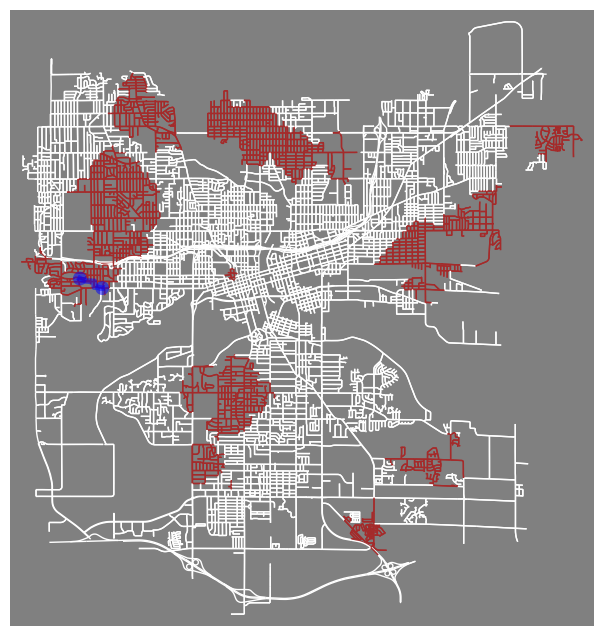

In [8]:
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

### Grading

The assignment will be worth 10 points. Partial credit (5-7 points) will be given if any of these exercises are incomplete.

> You should complete the exercises and then perform a comparative analysis using the table below. First, use the source location with `location_id` **160854122** and the goal location with `location_id` **160855919**. This table should help you organize and compare your results for the given destination node in the Des Moines map.



| **Blind search method**     | **Number of nodes along the path** | **Time took** |
|---------------|--------------------|----------------|
| bfs\_efficient           |                    |                |
| dfs\_efficient         |                    |                |
| ucs |                    |                |


> You should redo a similar comparative analysis using the table below. This time, keep the source location as `location_id` **160854122**, but choose a different goal location (i.e., any `location_id` other than **160855919**). Then, organize and report your results for that goal node in the Des Moines map.


| **Blind search method**     | **Number of nodes along the path** | **Time took** |
|---------------|--------------------|----------------|
| bfs\_efficient           |                    |                |
| dfs\_efficient         |                    |                |
| ucs |           
### Turning it in

You should submit your Jupyter Notebook to the handin form on Blackboard. You can either submit a link to a shared version of your notebook from Google Colab (make it sharable so that anyone with the link can view it) or you can directly attach the .ipynb file to the handin form.